In [3]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import netCDF4
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rioxarray as rio

In [24]:
#load in temp data
temp_1999 = xr.open_dataset("../Temperature/Output Deliverable/export_1999.nc")
temp_2008 = xr.open_dataset("../Temperature/Output Deliverable/export_2008.nc")
temp_change = xr.open_dataset("../Temperature/Output Deliverable/export_change.nc")
#load in whale data
loc_1999 = pd.read_csv('exports/loc_1999.csv')
loc_2008 = pd.read_csv('exports/loc_2008.csv')
temp_1999

<xarray.Dataset> Size: 13kB
Dimensions:      (lat: 26, lev: 1, lon: 57, year: 1)
Coordinates:
  * lat          (lat) float64 208B 4.0 6.0 8.0 10.0 ... 48.0 50.0 52.0 54.0
  * lev          (lev) float64 8B 0.0
  * lon          (lon) float64 456B 194.0 196.0 198.0 ... 302.0 304.0 306.0
  * year         (year) int64 8B 1999
Data variables:
    spatial_ref  int64 8B ...
    sst          (year, lev, lat, lon) float32 6kB ...
    ssta         (year, lev, lat, lon) float32 6kB ...
Attributes: (12/41)
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link:              C00884
    id:                         ersst.v4.199909
    naming_authority:           gov.noaa.ncdc
    title:                      NOAA ERSSTv4 (in situ only)
    ...                         ...
    instrument:                 Conventional thermometers
    source:                     ICOADS R2.5 SST, NCEP GTS SST, HadISST ice, N...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2015: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...
    description:                In situ data: ICOADS2.5 before 2007, NCEP in ...

In [11]:
loc_1999

,time,long,lat,id,geometry,distances (m)
0,1999-02-21 15:09:18,-112.277,25.533,1998CA-Bmu-00824,POINT (788536.8972395642 -1346059.8183378302),0.000000
1,1999-03-12 16:30:43,-113.582,25.897,1998CA-Bmu-00824,POINT (652833.9703293808 -1316415.6088371938),138903.072424
2,1999-03-14 23:16:39,-114.355,26.996,1998CA-Bmu-00824,POINT (567161.0387418801 -1201587.5869525443),143266.624923
3,1999-03-15 11:48:58,-114.797,27.259,1998CA-Bmu-00824,POINT (521220.383055909 -1175388.7235646346),52885.955486
4,1999-03-15 23:57:31,-115.032,27.586,1998CA-Bmu-00824,POINT (495824.9727471923 -1140884.8835051572),42842.056949
...,...,...,...,...,...,...
1641,1999-12-14 16:00:28,-122.007,21.730,1999CA-Bmu-23043,POINT (-213844.54620464134 -1787579.4769301838),116583.339827
1642,1999-12-15 12:00:55,-122.871,21.247,1999CA-Bmu-23043,POINT (-307449.9553232492 -1837063.608002929),105880.365717
1643,1999-12-15 17:16:22,-122.755,21.083,1999CA-Bmu-23043,POINT (-295542.42928177316 -1855016.6763470885),21543.022987
1644,1999-12-16 04:21:51,-122.272,20.831,1999CA-Bmu-23043,POINT (-244386.79972942552 -1883391.7494768053),58498.232538


In [5]:
# Load CSV data into a pandas DataFrame
df = pd.read_csv('your_dataset.csv')

# Convert DataFrame to xarray Dataset
ds = df.set_index(['lat', 'lon']).to_xarray()

<xarray.Dataset> Size: 13kB
Dimensions:      (lat: 26, lev: 1, lon: 57, year: 1)
Coordinates:
  * lat          (lat) float64 208B 4.0 6.0 8.0 10.0 ... 48.0 50.0 52.0 54.0
  * lev          (lev) float64 8B 0.0
  * lon          (lon) float64 456B 194.0 196.0 198.0 ... 302.0 304.0 306.0
  * year         (year) int64 8B 1999
Data variables:
    spatial_ref  int64 8B ...
    sst          (year, lev, lat, lon) float32 6kB ...
    ssta         (year, lev, lat, lon) float32 6kB ...
Attributes: (12/41)
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link:              C00884
    id:                         ersst.v4.199909
    naming_authority:           gov.noaa.ncdc
    title:                      NOAA ERSSTv4 (in situ only)
    ...                         ...
    instrument:                 Conventional thermometers
    source:                     ICOADS R2.5 SST, NCEP GTS SST, HadISST ice, N...
    comment:                    SSTs were observed by conventional thermomete...
    references:                 Huang et al, 2015: Extended Reconstructed Sea...
    climatology:                Climatology is based on 1971-2000 SST, Xue, Y...
    description:                In situ data: ICOADS2.5 before 2007, NCEP in ...

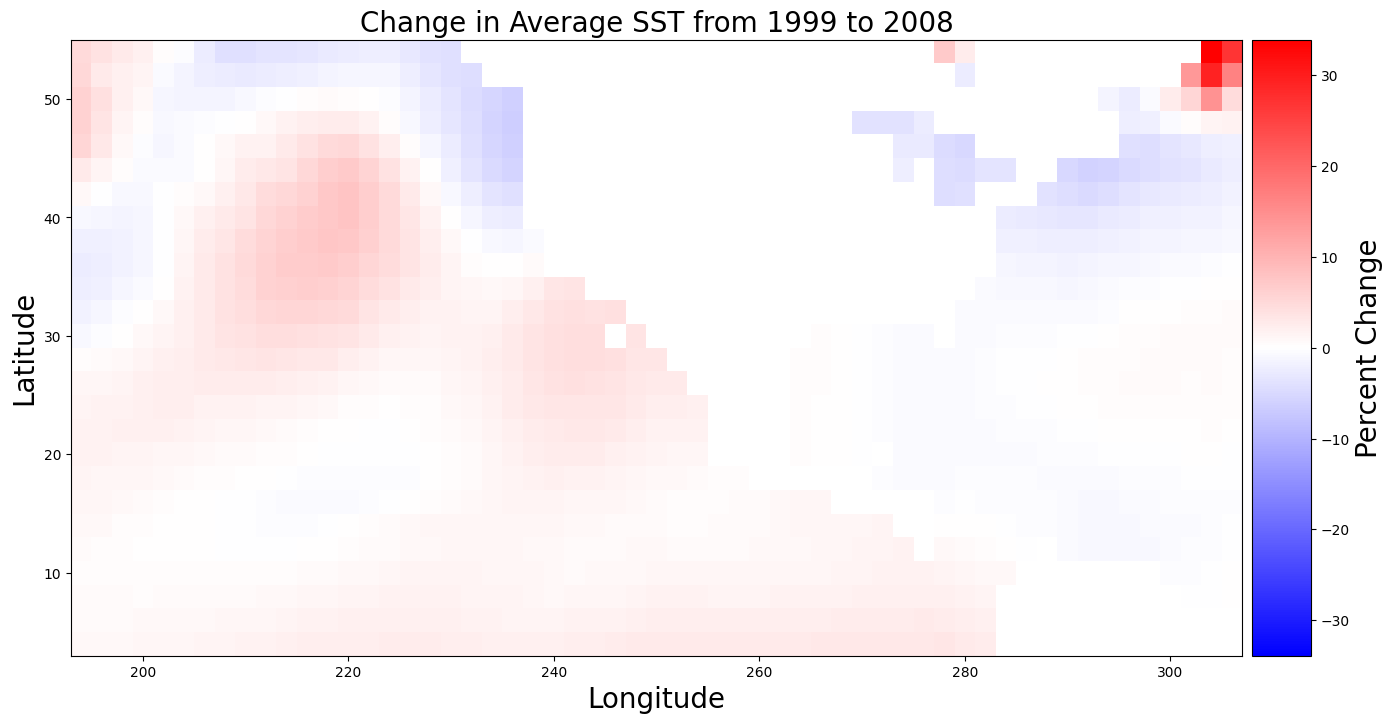

In [8]:

# Plot the SST change
fig, ax = plt.subplots(figsize=(16, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting the change in SST
vmin = -6.3718505
vmax = 33.911922
midpoint = 0

# Specify the colormap centered at 0
im = temp_change.change_percent.plot(ax=ax, cbar_ax=cax, cmap='bwr', center=midpoint)
ax.set_title("Change in Average SST from 1999 to 2008", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)
ax.set_xlabel("Longitude", fontsize=20)

# Set colorbar label
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("Percent Change", fontsize=20)

plt.show()